In [1]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [2]:
SWW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#32 SWW1.csv.csv")
SWW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#33 SWW2.csv.csv")
SWW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#34 SWW3.csv.csv")
SWW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#35 SWW4.csv.csv")
SWW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#36 SWW5.csv.csv")

In [3]:
#Loading the corresponding force data
force_SWW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#32 SWW1.log" , delimiter = "\t")
force_SWW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#33 SWW2.log" , delimiter = "\t")
force_SWW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#34 SWW3.log" , delimiter = "\t")
force_SWW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#35 SWW4.log" , delimiter = "\t")
force_SWW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#36 SWW5.log" , delimiter = "\t")

In [4]:
#Visulizing the force data - test #2 - 6 - SWW1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_SWW1 = force_SWW1["Time"]
x_force_SWW2 = force_SWW2["Time"]
x_force_SWW3 = force_SWW3["Time"]
x_force_SWW4 = force_SWW4["Time"]
x_force_SWW5 = force_SWW5["Time"]

#force
Load_SWW1 = force_SWW1["Load"]
Load_SWW2 = force_SWW2["Load"]
Load_SWW3 = force_SWW3["Load"]
Load_SWW4 = force_SWW4["Load"]
Load_SWW5 = force_SWW5["Load"]

#plt.plot(x_force_SWW1,Load_SWW1,color = 'green', label = 'force data SWW1 test #32' )
#plt.plot(x_force_SWW2,Load_SWW2,color = 'blue', label = 'force data SWW2 test #33' )
# plt.plot(x_force_SWW3,Load_SWW3,color = 'yellow', label = 'force data SWW3 test #34' )
# plt.plot(x_force_SWW4,Load_SWW4,color = 'red', label = 'force data SWW4 test #35' )
# plt.plot(x_force_SWW5,Load_SWW5,color = 'brown', label = 'force data SWW5 test #36' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for SWW1


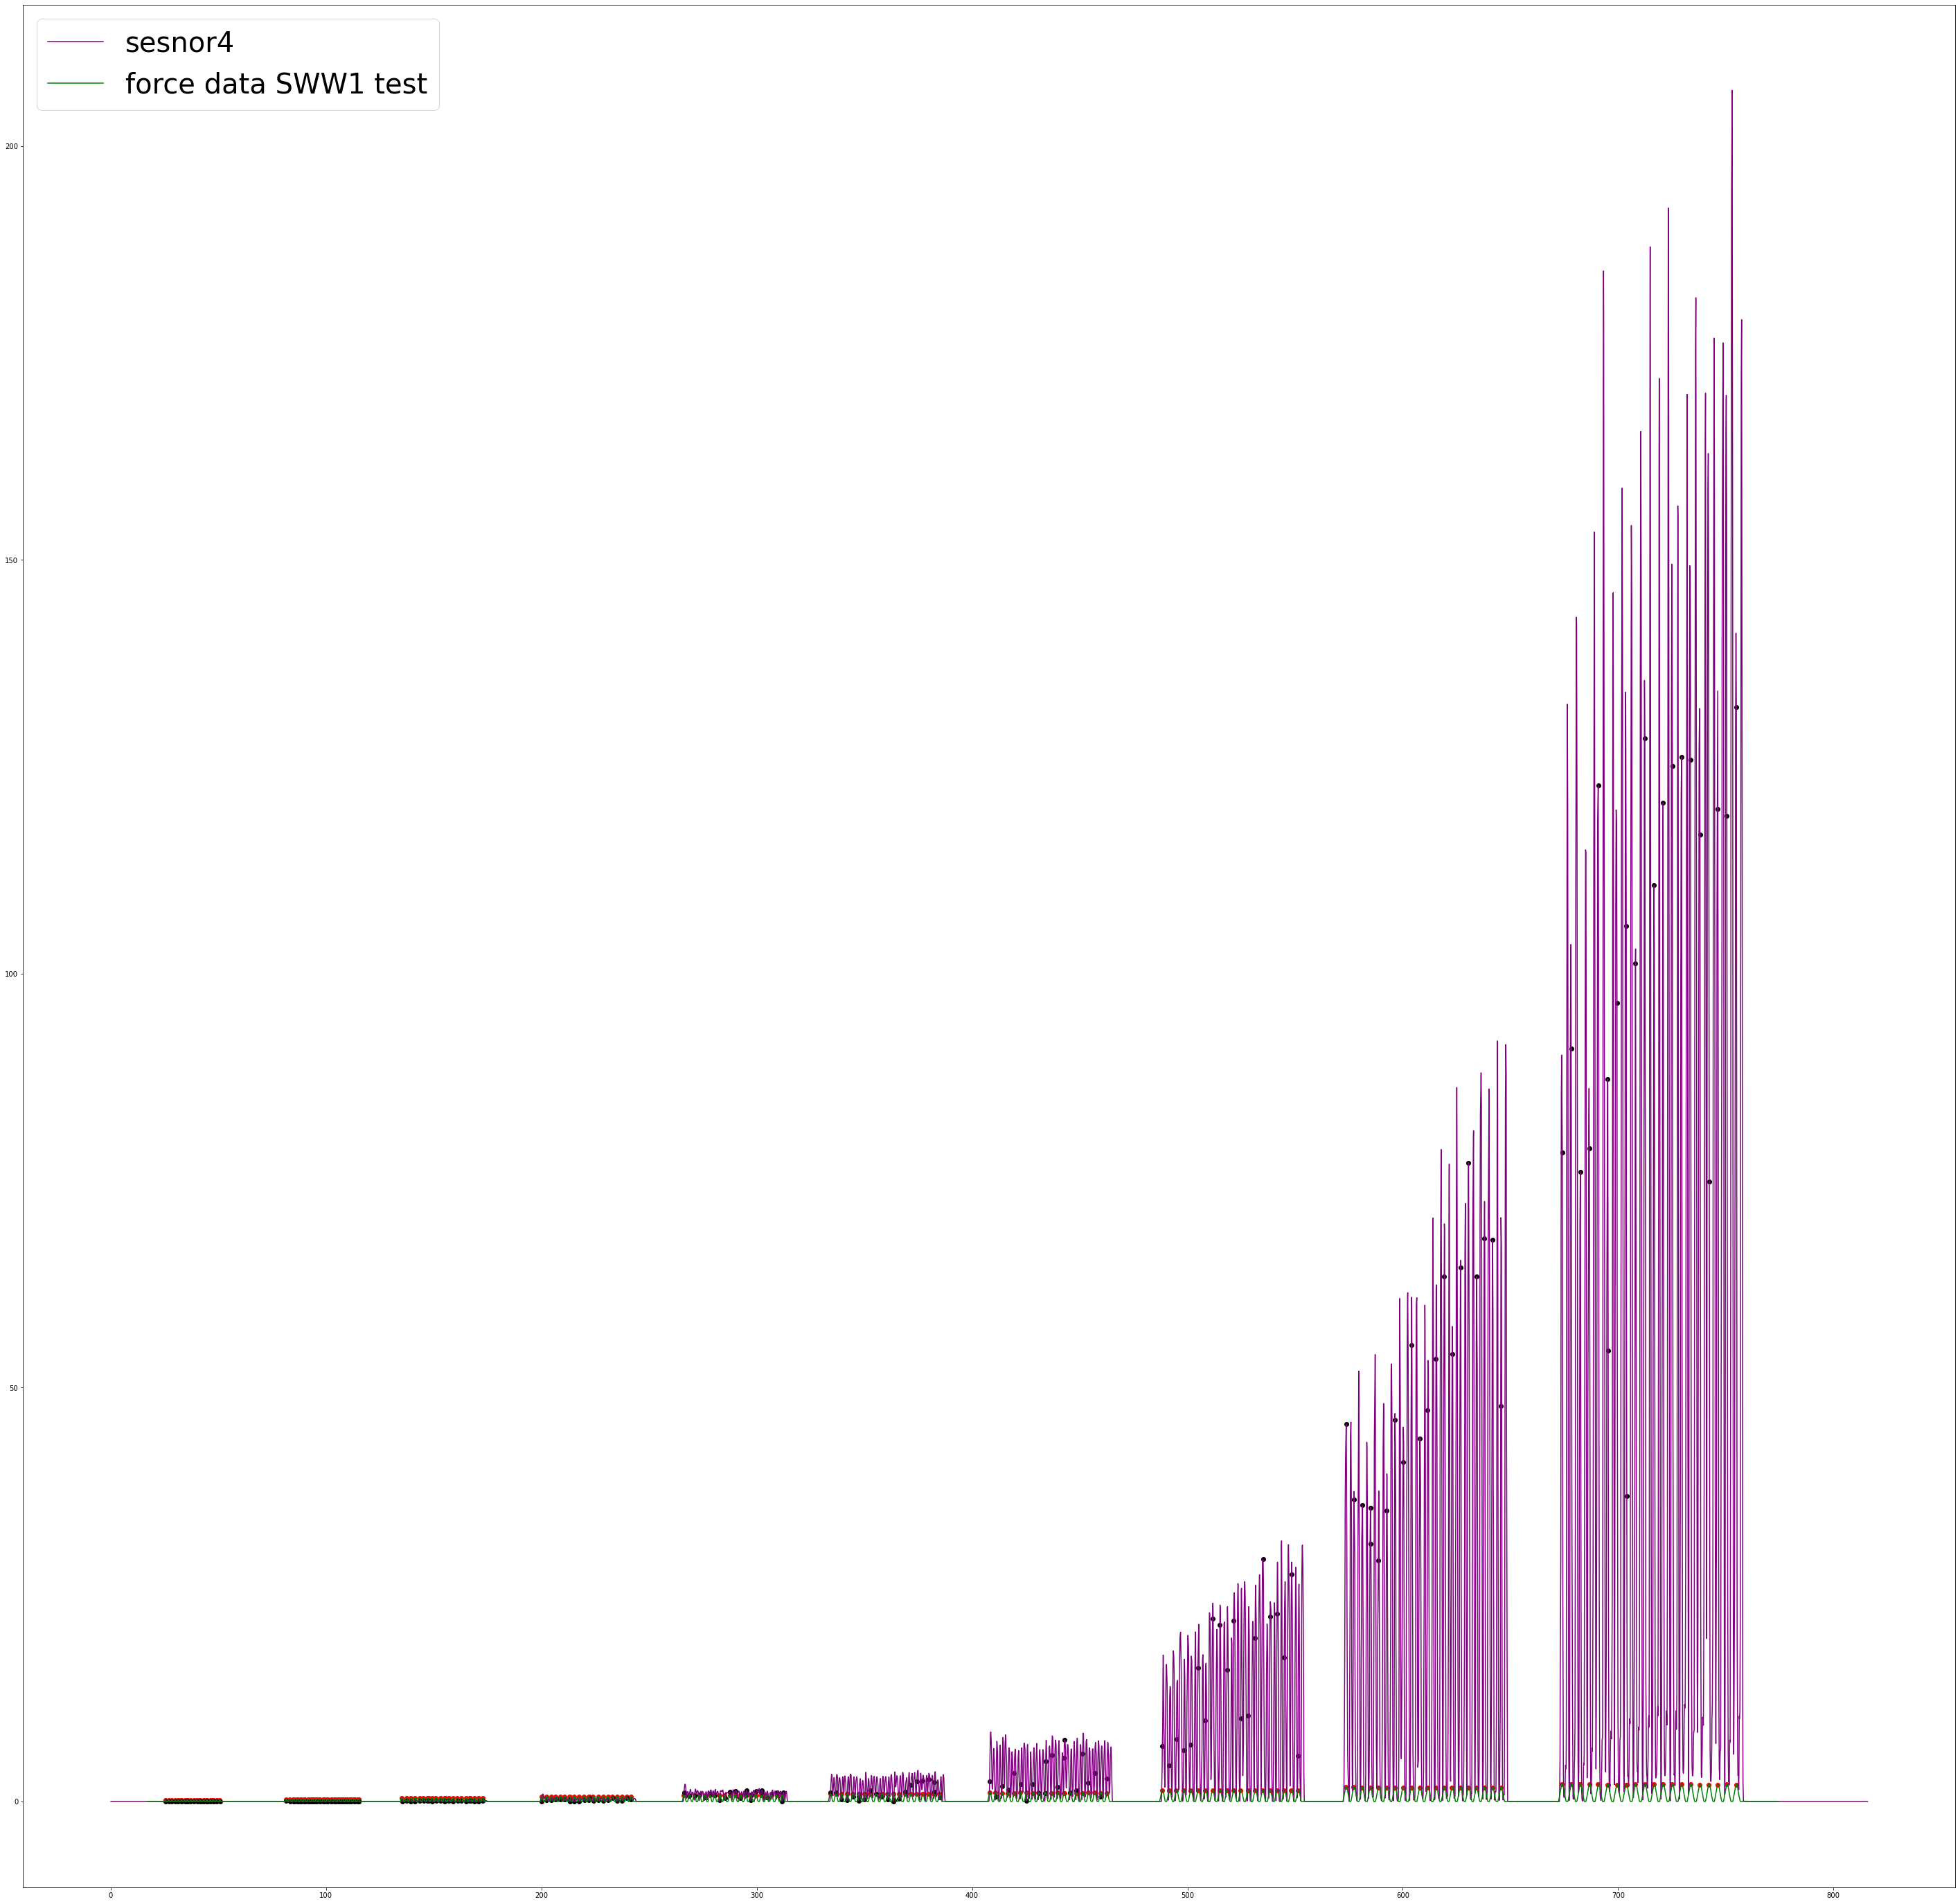

In [16]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SWW1

plt.figure(figsize=(50, 50))

# plt.plot(SWW1["Unnamed: 0"],SWW1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SWW1["Unnamed: 0"],SWW1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SWW1["Unnamed: 0"],SWW1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SWW1["Unnamed: 0"],SWW1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SWW1 = x_force_SWW1 + 17
scaled_SWW1 = SWW1["Unnamed: 0"]

plt.plot(scaled_SWW1,SWW1["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_SWW1,Load_SWW1,color = 'green', label = 'force data SWW1 test' )


plt.legend(fontsize=40)


print("Sensor 4 is more profound for SWW1")

#finding the peaks

pidx_Load_SWW1, _ = find_peaks(Load_SWW1,prominence= 0.1 )
peaks_Load_SWW1 = Load_SWW1[pidx_Load_SWW1]
peaks_Ltime_SWW1 = scaled_x_force_SWW1[pidx_Load_SWW1]

plt.scatter(peaks_Ltime_SWW1,peaks_Load_SWW1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SWW1time = []

peaks_Ltime_SWW1.reset_index(drop = True, inplace = True)
peaks_Load_SWW1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SWW1)):
    idx_SWW1time.append(bisect.bisect_left(SWW1["Unnamed: 0"], peaks_Ltime_SWW1[i]))

plt.scatter(SWW1["Unnamed: 0"][idx_SWW1time],SWW1["s4_d"][idx_SWW1time],color = 'black')

In [18]:
#Storing the peaks into csv file - SWW1
Load_SWW1peaks =[]

for i in range(len(peaks_Load_SWW1)):
    Load_SWW1peaks.append(peaks_Load_SWW1[i])
    
content_SWW1 = {'R1':SWW1["s1_d"][idx_SWW1time],
              'R2':SWW1["s2_d"][idx_SWW1time],
              'R3':SWW1["s3_d"][idx_SWW1time],
              'R4':SWW1["s4_d"][idx_SWW1time], 
              'Load': Load_SWW1peaks} 

df_SWW1 = pd.DataFrame(content_SWW1, columns = ['R1','R2','R3','R4','Load'])

df_SWW1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SWW1.csv',index = False, header = True)

Sensor 4 is more profound for SWW2


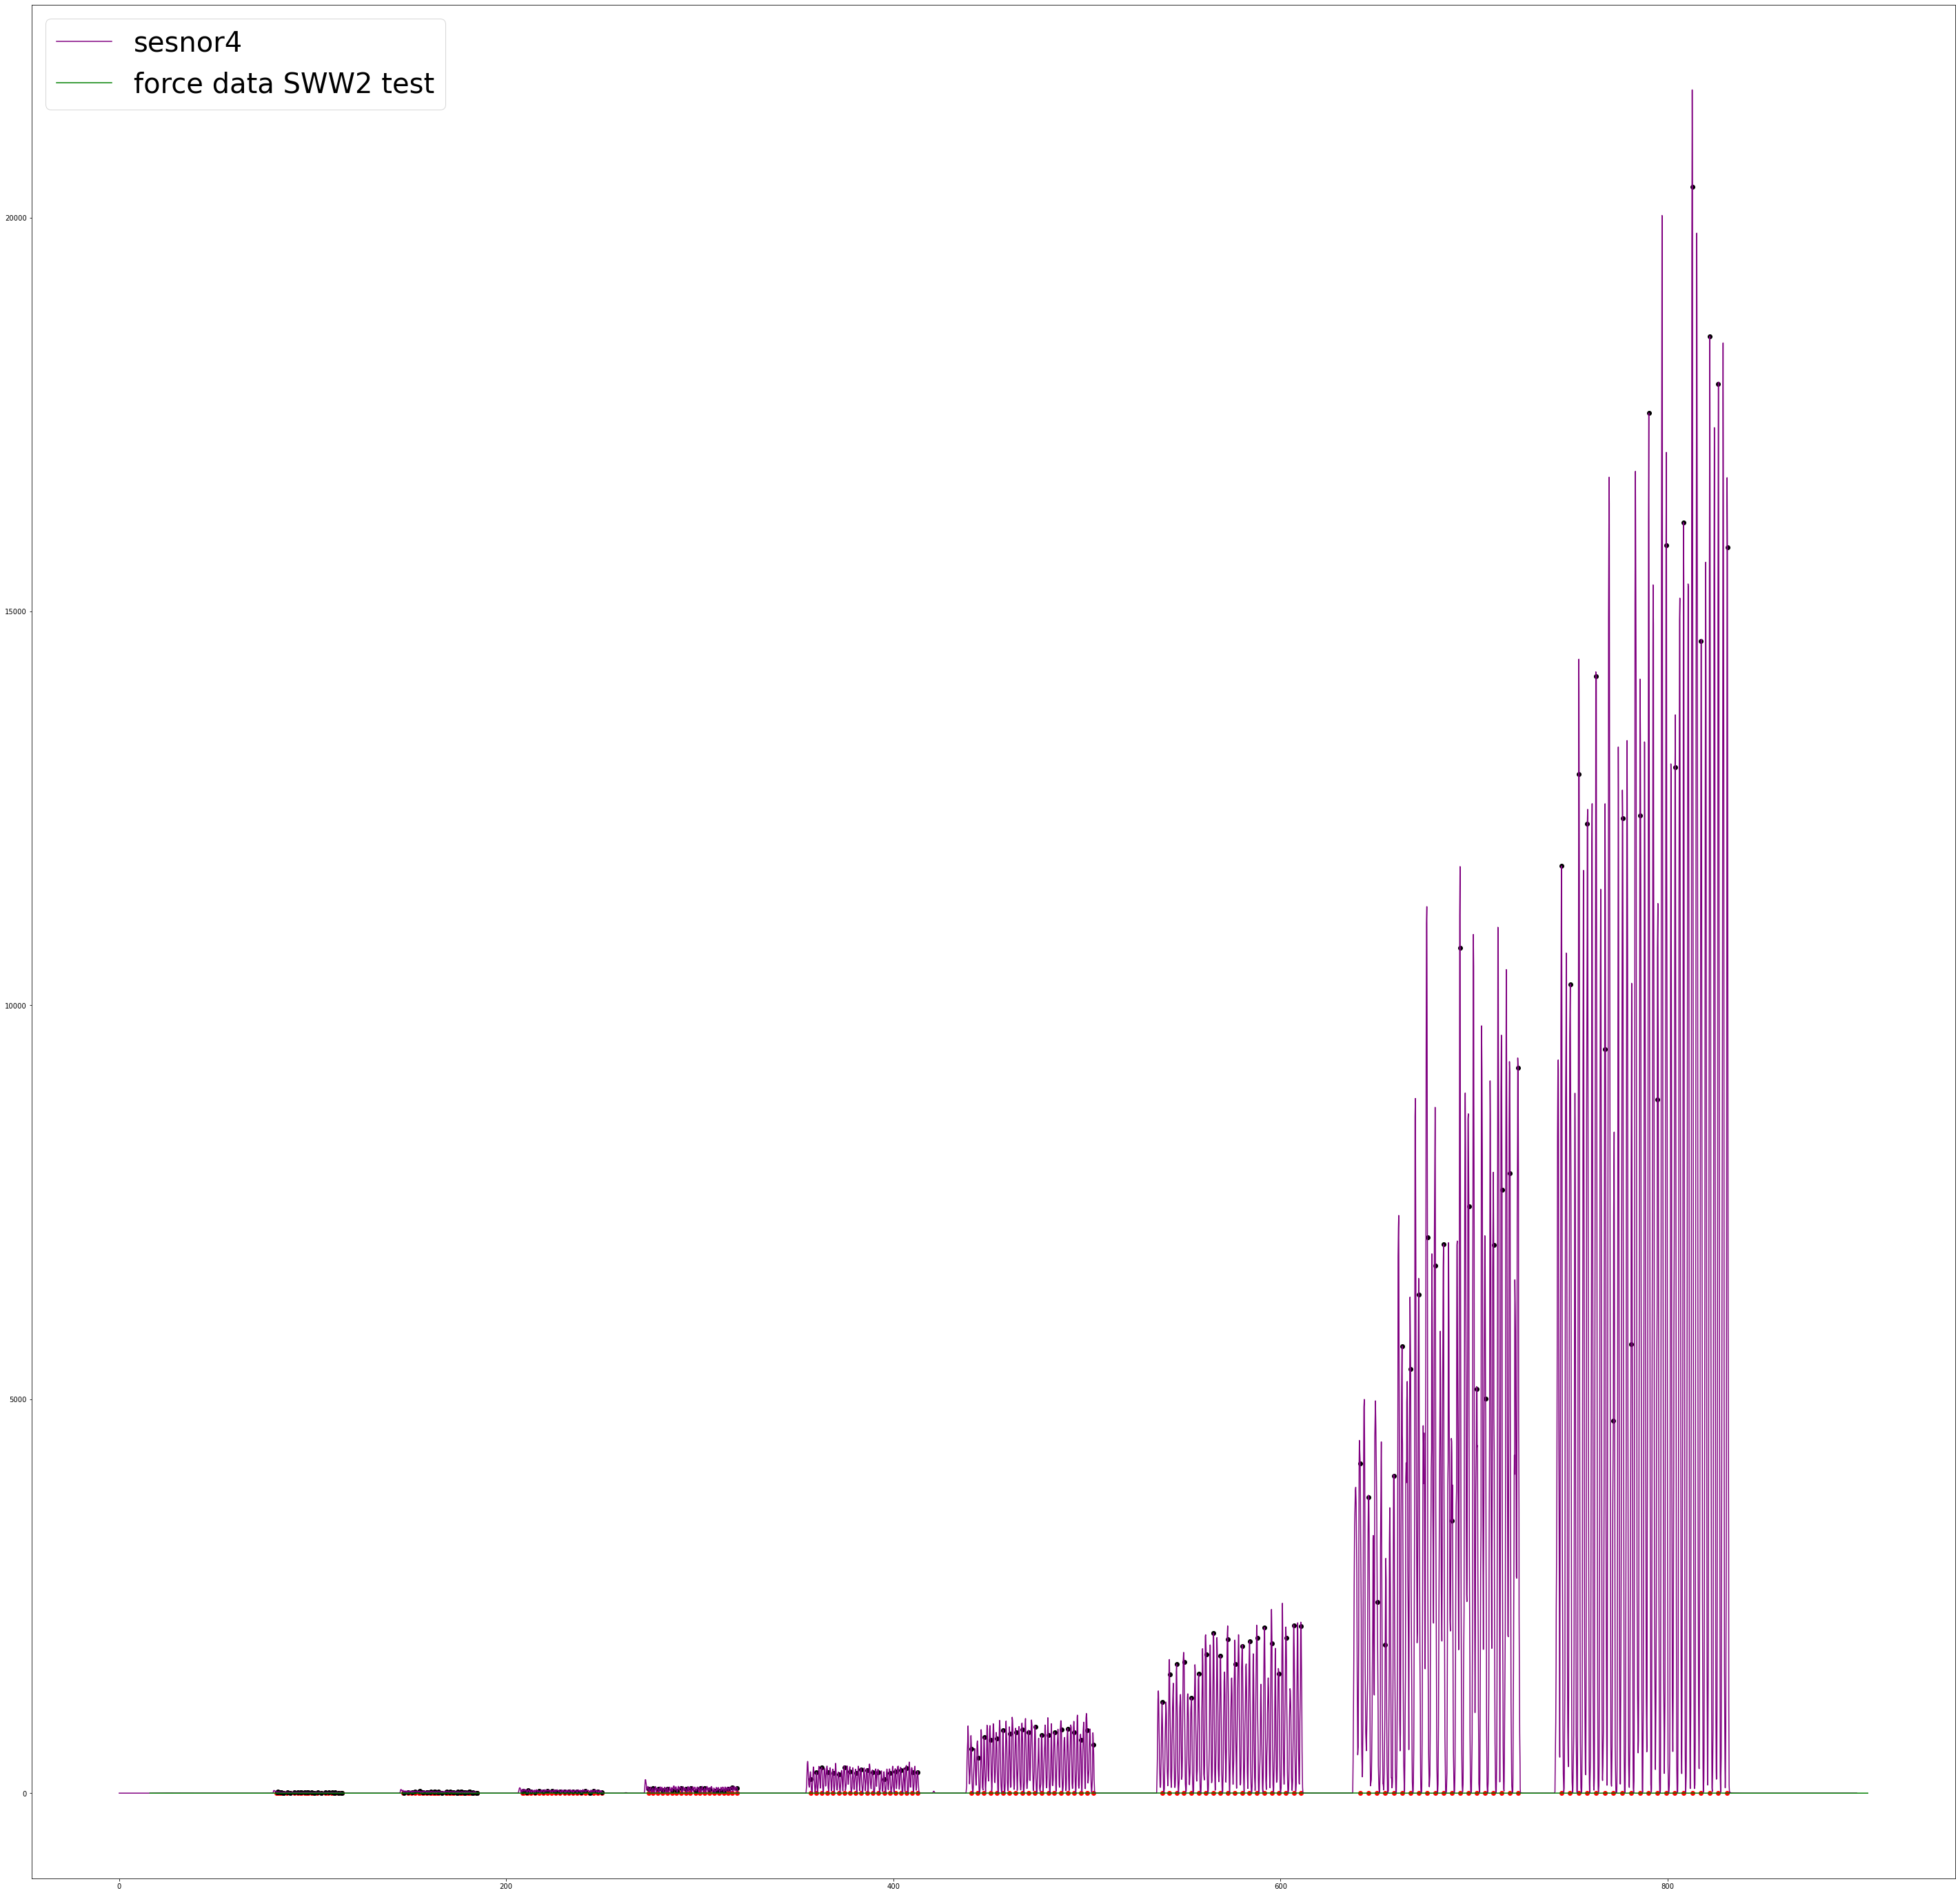

In [24]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SWW2

plt.figure(figsize=(50, 50))

# plt.plot(SWW2["Unnamed: 0"],SWW2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SWW2["Unnamed: 0"],SWW2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SWW2["Unnamed: 0"],SWW2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SWW2["Unnamed: 0"],SWW2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SWW2 = x_force_SWW2 + 16
scaled_SWW2 = SWW2["Unnamed: 0"]

plt.plot(scaled_SWW2,SWW2["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_SWW2,Load_SWW2,color = 'green', label = 'force data SWW2 test')


plt.legend(fontsize=40)


print("Sensor 4 is more profound for SWW2")

#finding the peaks

pidx_Load_SWW2, _ = find_peaks(Load_SWW2,prominence= 0.1 )
peaks_Load_SWW2 = Load_SWW2[pidx_Load_SWW2]
peaks_Ltime_SWW2 = scaled_x_force_SWW2[pidx_Load_SWW2]

plt.scatter(peaks_Ltime_SWW2,peaks_Load_SWW2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SWW2time = []

peaks_Ltime_SWW2.reset_index(drop = True, inplace = True)
peaks_Load_SWW2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SWW2)):
    idx_SWW2time.append(bisect.bisect_left(SWW2["Unnamed: 0"], peaks_Ltime_SWW2[i]))

plt.scatter(SWW2["Unnamed: 0"][idx_SWW2time],SWW2["s4_d"][idx_SWW2time],color = 'black')

In [25]:
#Storing the peaks into csv file - SWW2
Load_SWW2peaks =[]

for i in range(len(peaks_Load_SWW2)):
    Load_SWW2peaks.append(peaks_Load_SWW2[i])
    
content_SWW2 = {'R1':SWW2["s1_d"][idx_SWW2time],
              'R2':SWW2["s2_d"][idx_SWW2time],
              'R3':SWW2["s3_d"][idx_SWW2time],
              'R4':SWW2["s4_d"][idx_SWW2time], 
              'Load': Load_SWW2peaks} 

df_SWW2 = pd.DataFrame(content_SWW2, columns = ['R1','R2','R3','R4','Load'])

df_SWW2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SWW2.csv',index = False, header = True)

Sensor 4 is more profound for SWW3


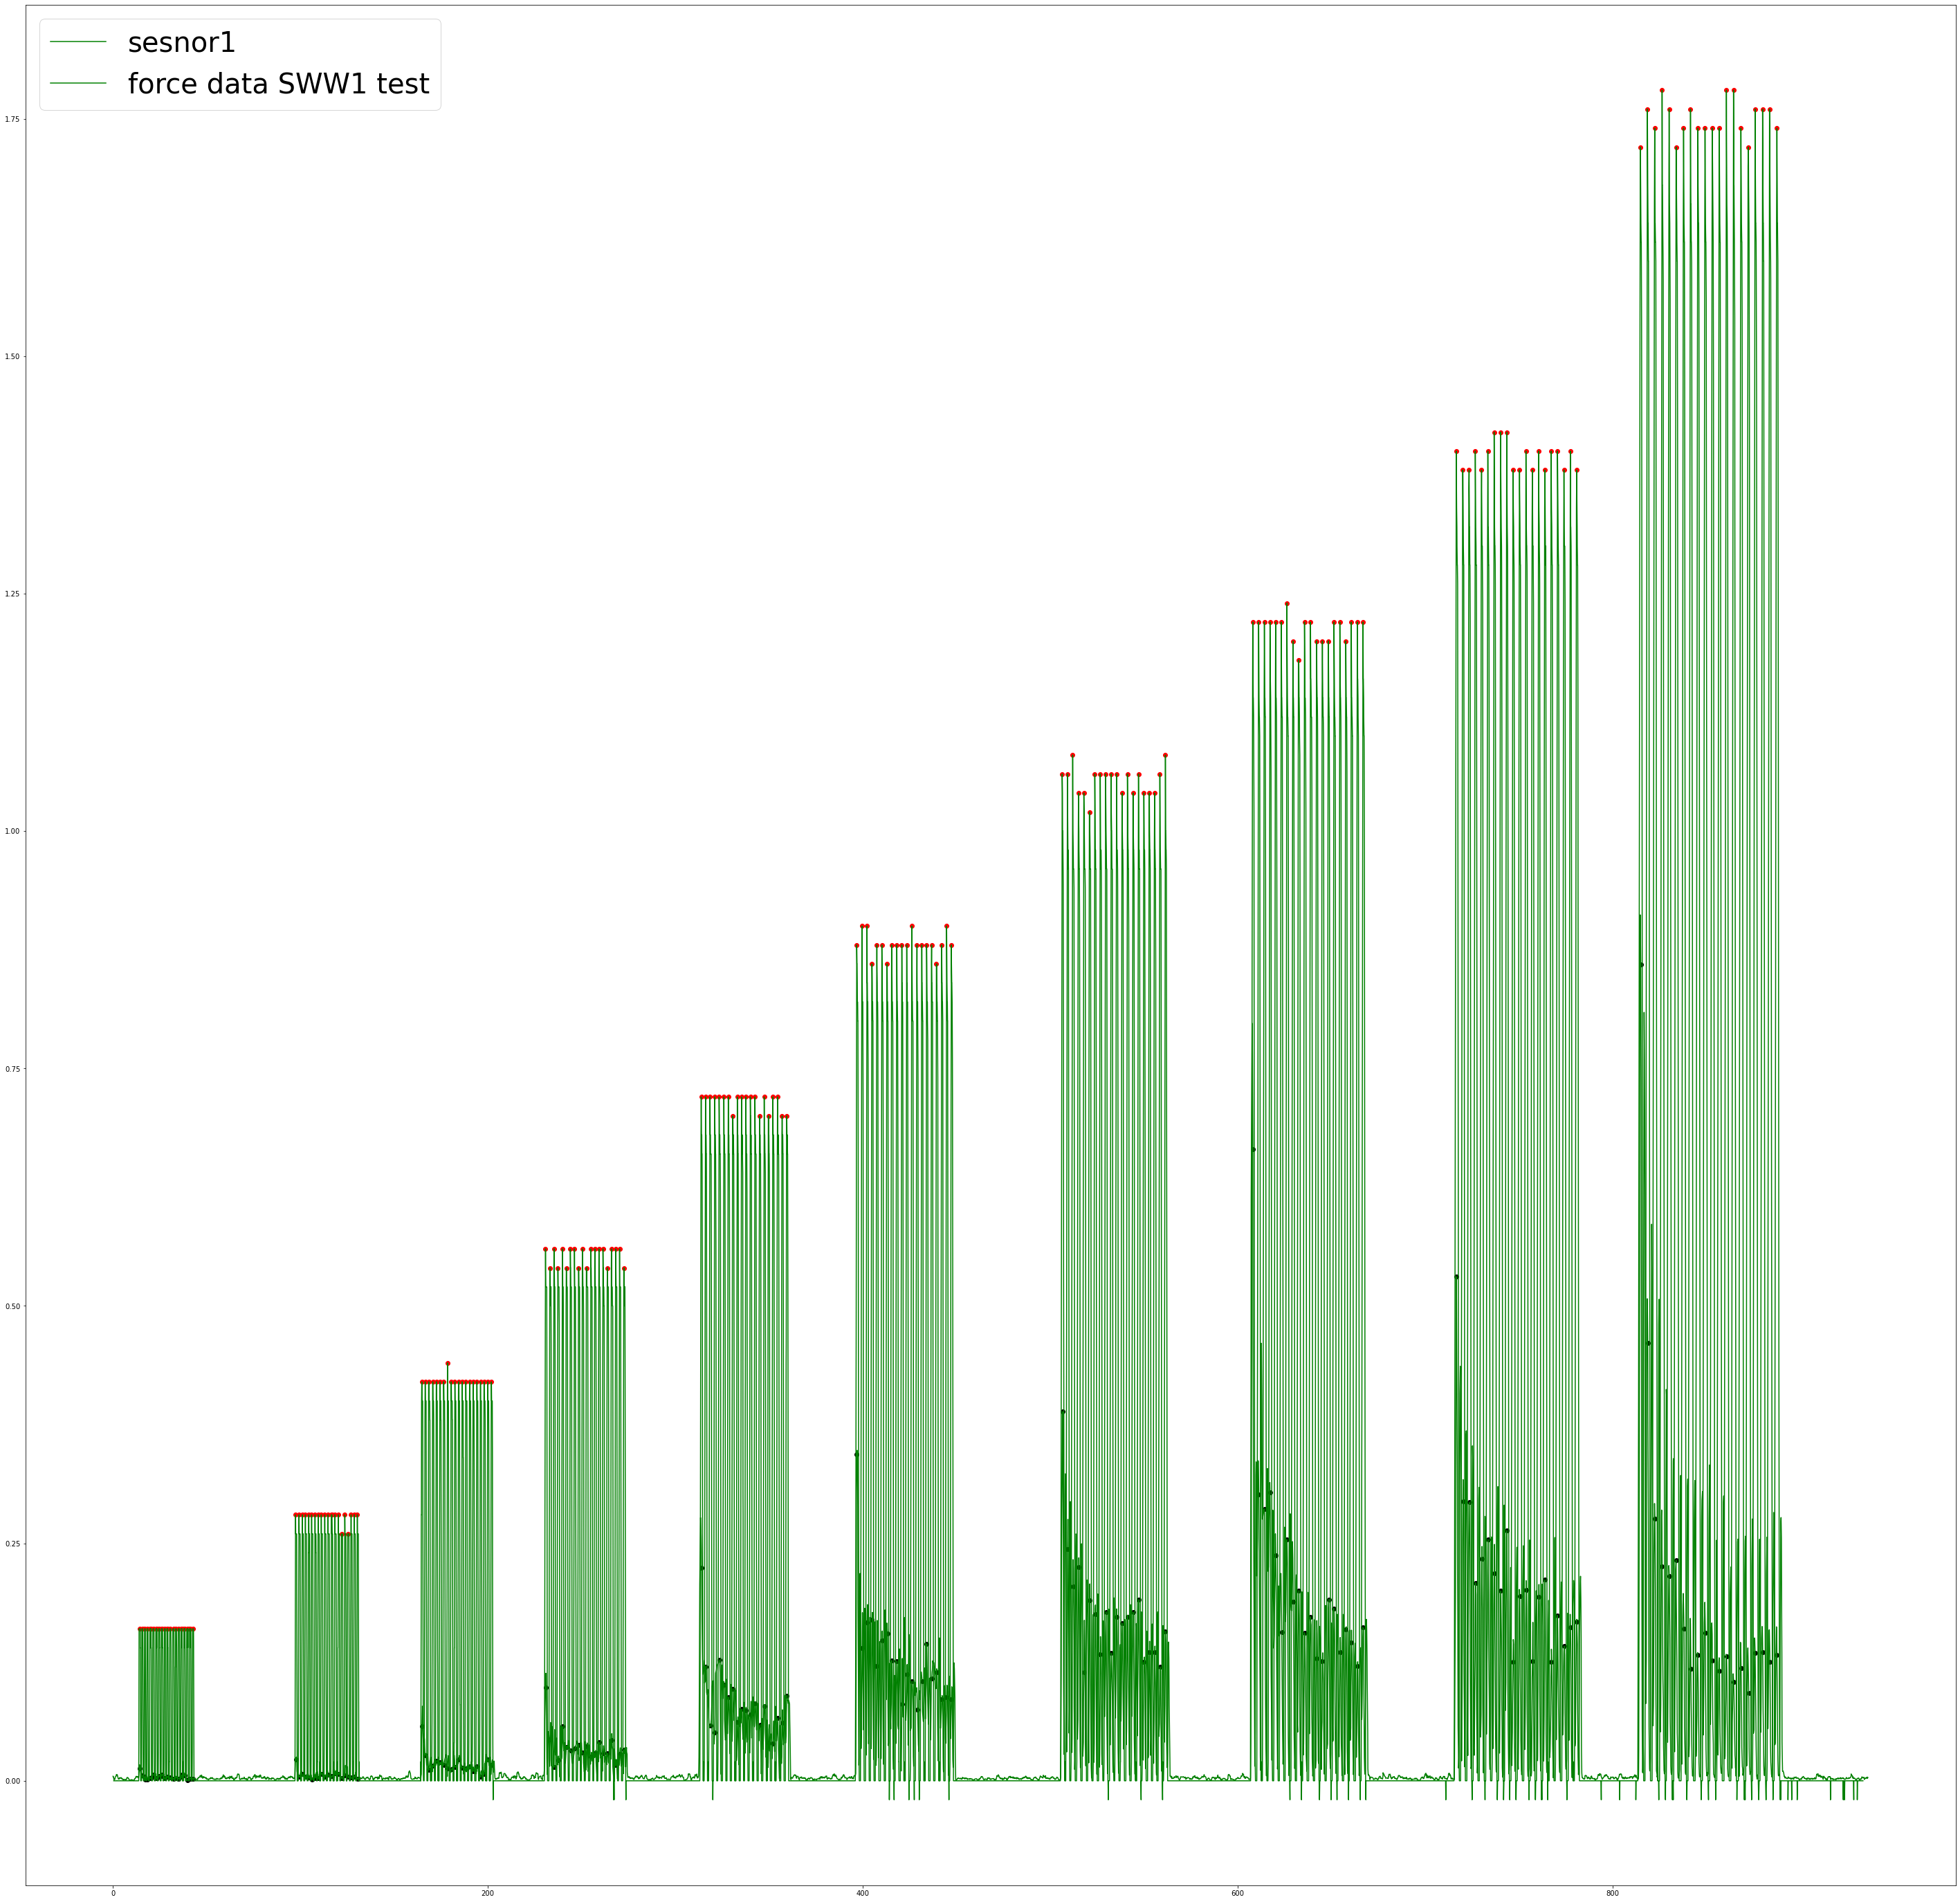

In [37]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SWW3

plt.figure(figsize=(50, 50))

plt.plot(SWW3["Unnamed: 0"],SWW3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SWW3["Unnamed: 0"],SWW3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SWW3["Unnamed: 0"],SWW3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SWW3["Unnamed: 0"],SWW3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SWW3 = x_force_SWW3 + 0.5
scaled_SWW3 = SWW3["Unnamed: 0"]

# plt.plot(scaled_SWW3,SWW3["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_SWW3,Load_SWW3,color = 'green', label = 'force data SWW1 test' )


plt.legend(fontsize=40)


print("Sensor 4 is more profound for SWW3")

#finding the peaks

pidx_Load_SWW3, _ = find_peaks(Load_SWW3,prominence= 0.1 )
peaks_Load_SWW3 = Load_SWW3[pidx_Load_SWW3]
peaks_Ltime_SWW3 = scaled_x_force_SWW3[pidx_Load_SWW3]

plt.scatter(peaks_Ltime_SWW3,peaks_Load_SWW3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SWW3time = []

peaks_Ltime_SWW3.reset_index(drop = True, inplace = True)
peaks_Load_SWW3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SWW3)):
    idx_SWW3time.append(bisect.bisect_left(SWW3["Unnamed: 0"], peaks_Ltime_SWW3[i]))

plt.scatter(SWW3["Unnamed: 0"][idx_SWW3time],SWW3["s1_d"][idx_SWW3time],color = 'black')

In [38]:
#Storing the peaks into csv file - SWW3
Load_SWW3peaks =[]

for i in range(len(peaks_Load_SWW3)):
    Load_SWW3peaks.append(peaks_Load_SWW3[i])
    
content_SWW3 = {'R1':SWW3["s1_d"][idx_SWW3time],
              'R2':SWW3["s2_d"][idx_SWW3time],
              'R3':SWW3["s3_d"][idx_SWW3time],
              'R4':SWW3["s4_d"][idx_SWW3time], 
              'Load': Load_SWW3peaks} 

df_SWW3 = pd.DataFrame(content_SWW3, columns = ['R1','R2','R3','R4','Load'])

df_SWW3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SWW3.csv',index = False, header = True)

Sensor 4 is more profound for SWW4


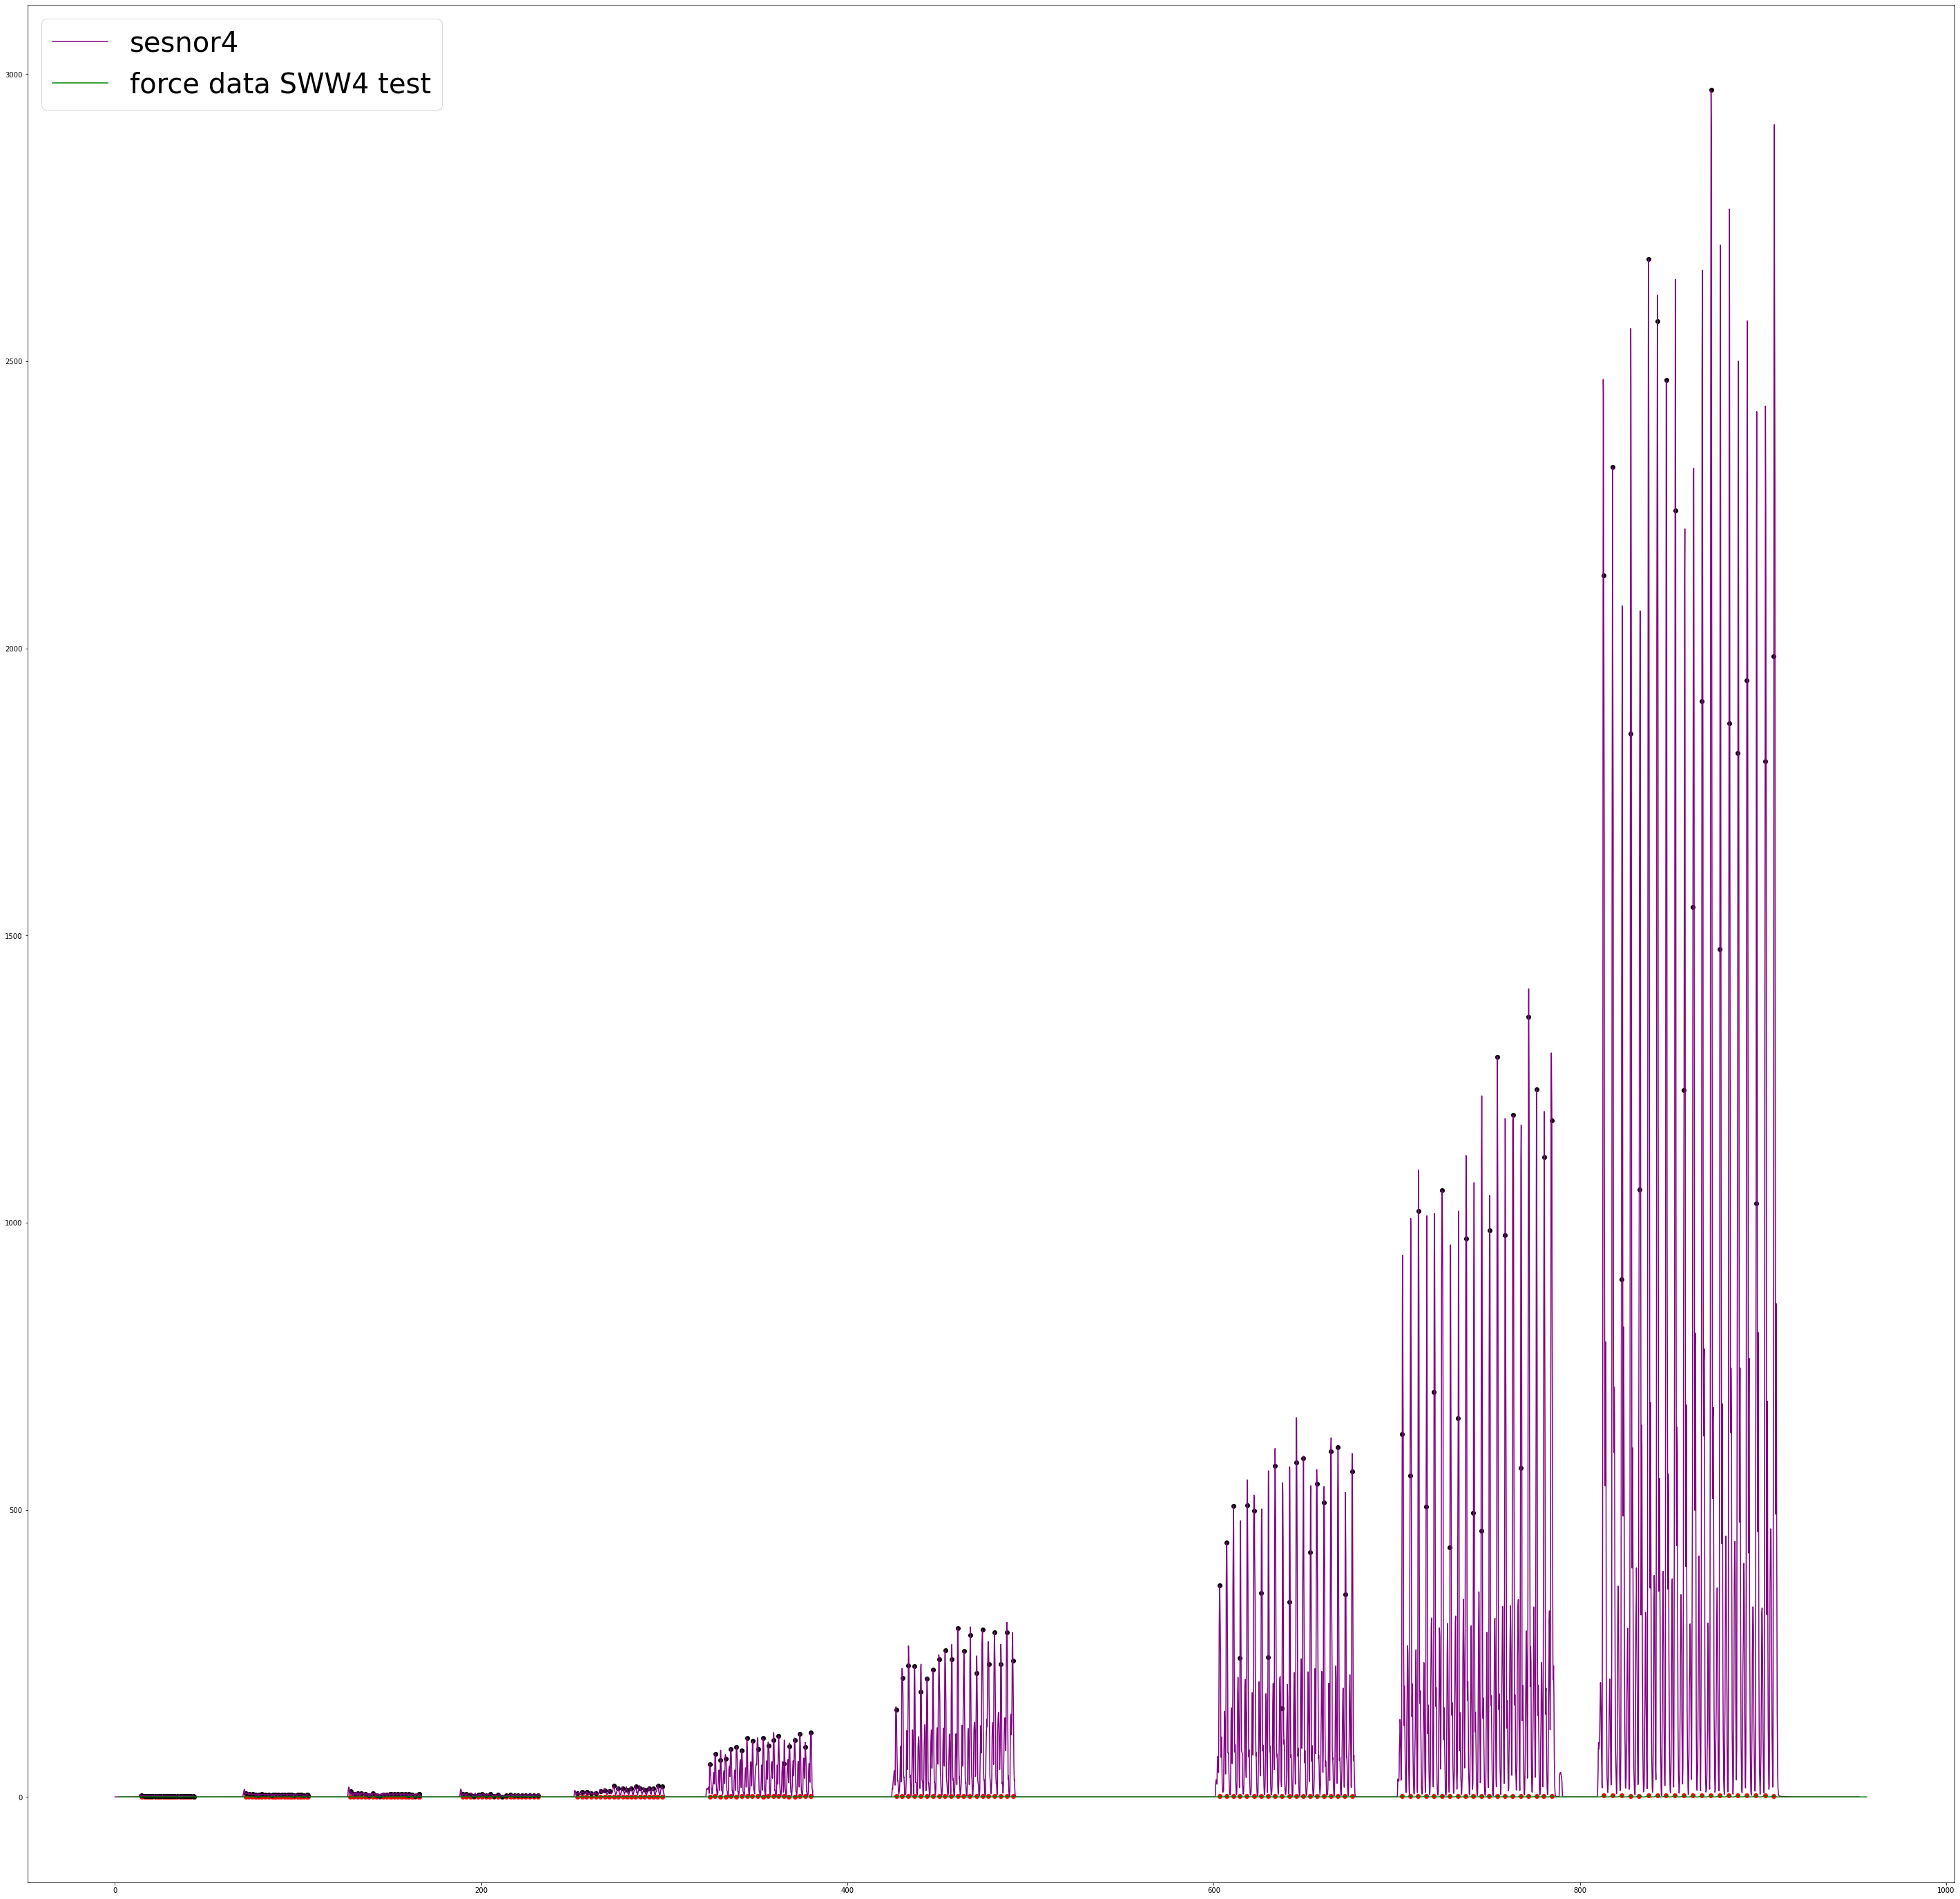

In [40]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SWW4

plt.figure(figsize=(50, 50))

# plt.plot(SWW4["Unnamed: 0"],SWW4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SWW4["Unnamed: 0"],SWW4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SWW4["Unnamed: 0"],SWW4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SWW4["Unnamed: 0"],SWW4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SWW4 = x_force_SWW4 + 2
scaled_SWW4 = SWW4["Unnamed: 0"]

plt.plot(scaled_SWW4,SWW4["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_SWW4,Load_SWW4,color = 'green', label = 'force data SWW4 test')


plt.legend(fontsize=40)


print("Sensor 4 is more profound for SWW4")

#finding the peaks

pidx_Load_SWW4, _ = find_peaks(Load_SWW4,prominence= 0.1 )
peaks_Load_SWW4 = Load_SWW4[pidx_Load_SWW4]
peaks_Ltime_SWW4 = scaled_x_force_SWW4[pidx_Load_SWW4]

plt.scatter(peaks_Ltime_SWW4,peaks_Load_SWW4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SWW4time = []

peaks_Ltime_SWW4.reset_index(drop = True, inplace = True)
peaks_Load_SWW4.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SWW4)):
    idx_SWW4time.append(bisect.bisect_left(SWW4["Unnamed: 0"], peaks_Ltime_SWW4[i]))

plt.scatter(SWW4["Unnamed: 0"][idx_SWW4time],SWW4["s4_d"][idx_SWW4time],color = 'black')

In [43]:
#Storing the peaks into csv file - SWW4
Load_SWW4peaks =[]

for i in range(len(peaks_Load_SWW4)):
    Load_SWW4peaks.append(peaks_Load_SWW4[i])
    
content_SWW4 = {'R1':SWW4["s1_d"][idx_SWW4time],
              'R2':SWW4["s2_d"][idx_SWW4time],
              'R3':SWW4["s3_d"][idx_SWW4time],
              'R4':SWW4["s4_d"][idx_SWW4time], 
              'Load': Load_SWW4peaks} 

df_SWW4 = pd.DataFrame(content_SWW4, columns = ['R1','R2','R3','R4','Load'])

df_SWW4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SWW4.csv',index = False, header = True)

Sensor 4 is more profound for SWW5


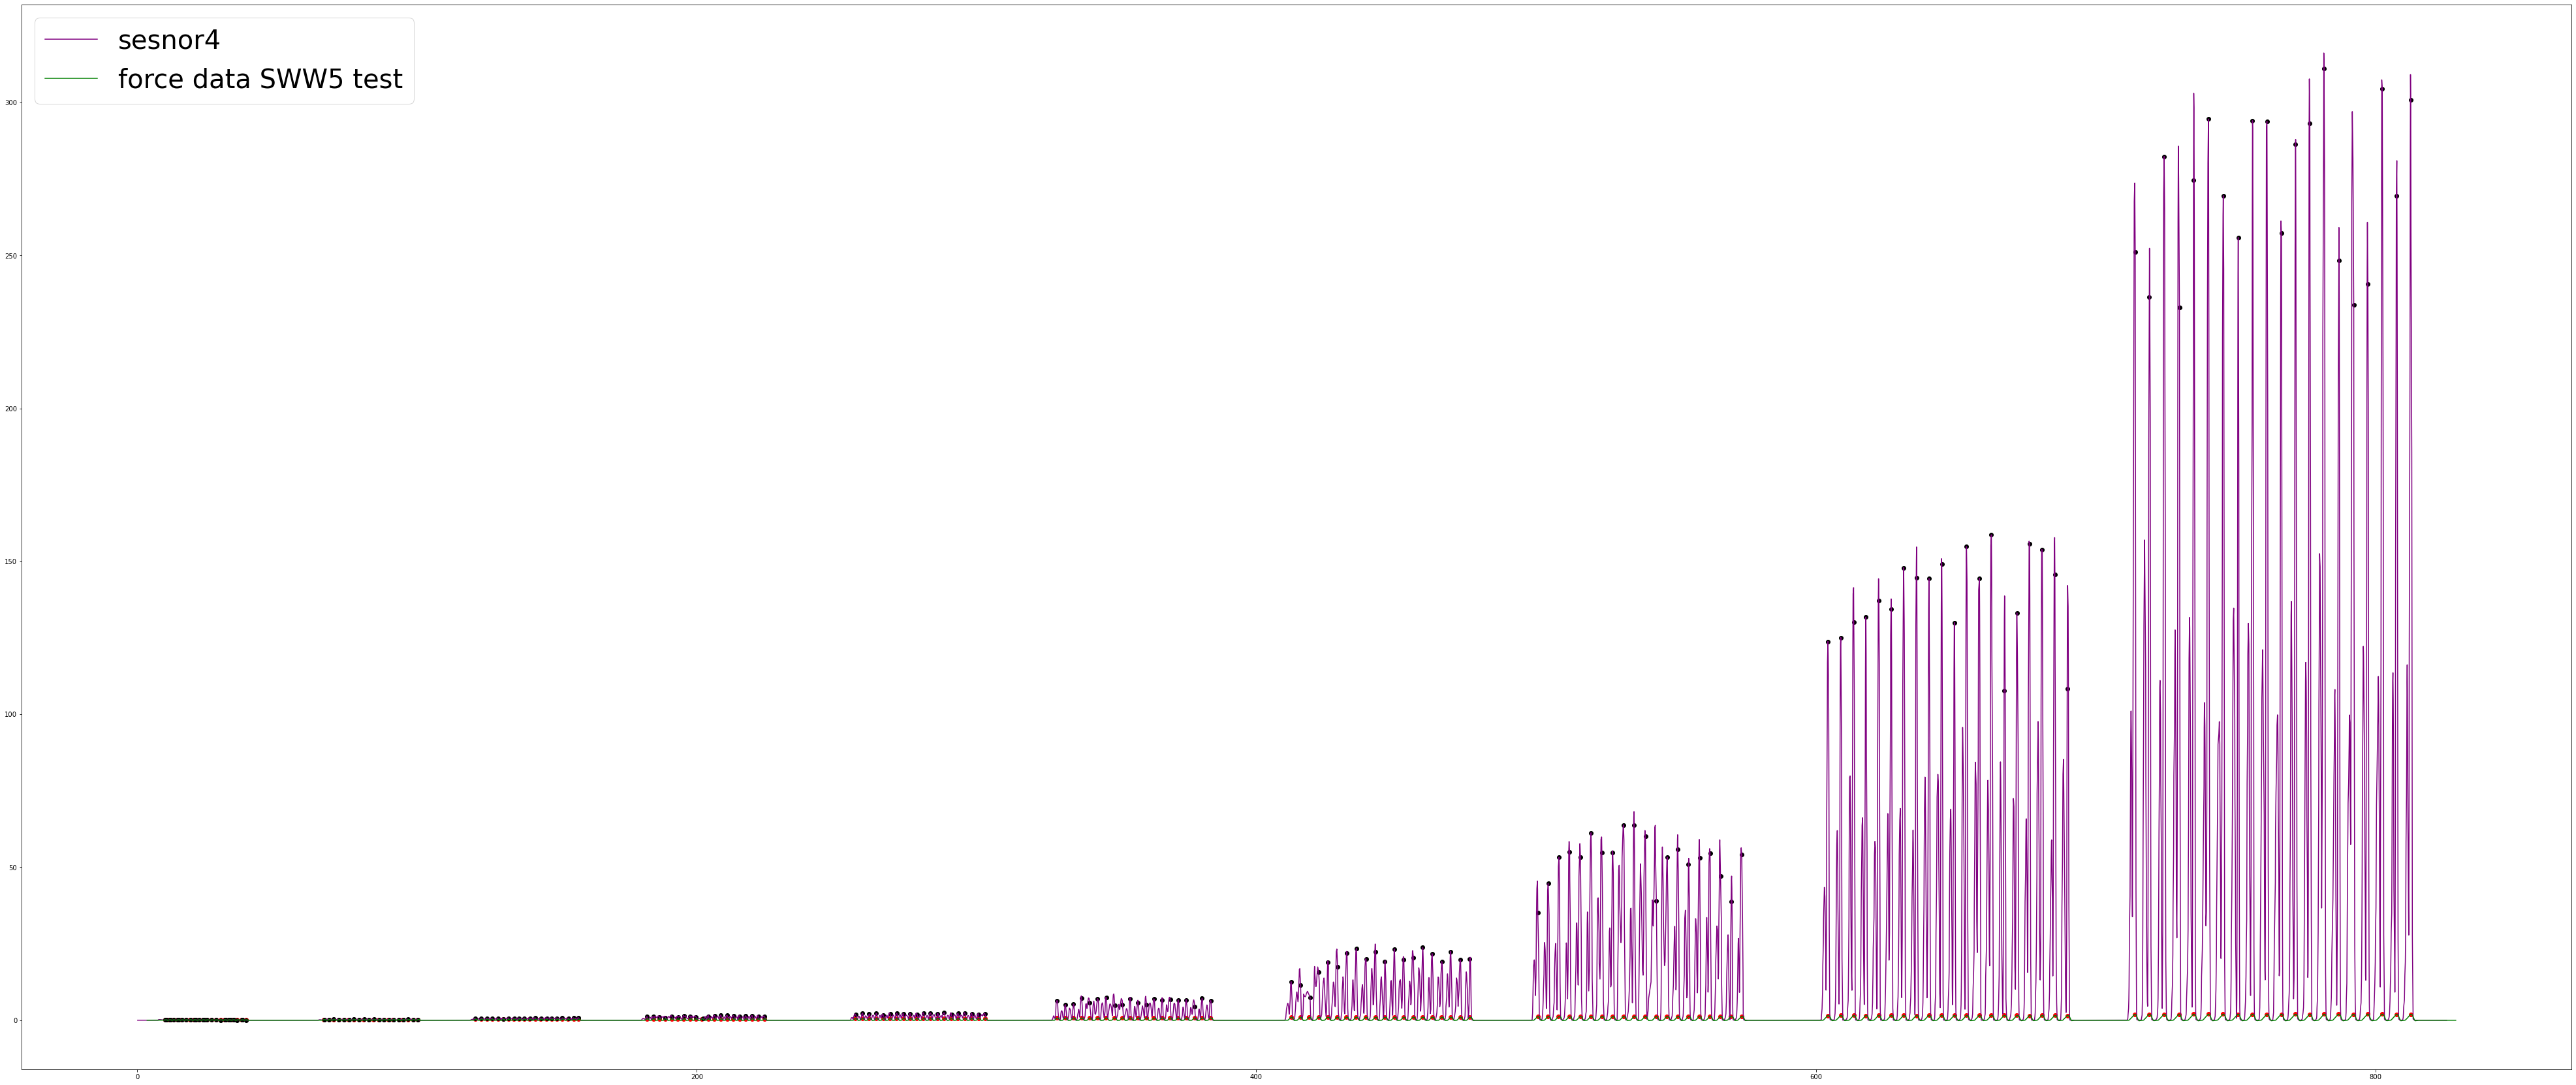

In [51]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SWW5

plt.figure(figsize=(70, 30))

# plt.plot(SWW5["Unnamed: 0"],SWW5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SWW5["Unnamed: 0"],SWW5["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SWW5["Unnamed: 0"],SWW5["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SWW5["Unnamed: 0"],SWW5["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SWW5 = x_force_SWW5 + 3.5
scaled_SWW5 = SWW5["Unnamed: 0"]

plt.plot(scaled_SWW5,SWW5["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_SWW5,Load_SWW5,color = 'green', label = 'force data SWW5 test' )


plt.legend(fontsize=40)


print("Sensor 4 is more profound for SWW5")

#finding the peaks

pidx_Load_SWW5, _ = find_peaks(Load_SWW5,prominence= 0.1 )
peaks_Load_SWW5 = Load_SWW5[pidx_Load_SWW5]
peaks_Ltime_SWW5 = scaled_x_force_SWW5[pidx_Load_SWW5]

plt.scatter(peaks_Ltime_SWW5,peaks_Load_SWW5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SWW5time = []

peaks_Ltime_SWW5.reset_index(drop = True, inplace = True)
peaks_Load_SWW5.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SWW5)):
    idx_SWW5time.append(bisect.bisect_left(SWW5["Unnamed: 0"], peaks_Ltime_SWW5[i]))

plt.scatter(SWW5["Unnamed: 0"][idx_SWW5time],SWW5["s4_d"][idx_SWW5time],color = 'black')

In [52]:
#Storing the peaks into csv file - SWW5
Load_SWW5peaks =[]

for i in range(len(peaks_Load_SWW5)):
    Load_SWW5peaks.append(peaks_Load_SWW5[i])
    
content_SWW5 = {'R1':SWW5["s1_d"][idx_SWW5time],
              'R2':SWW5["s2_d"][idx_SWW5time],
              'R3':SWW5["s3_d"][idx_SWW5time],
              'R4':SWW5["s4_d"][idx_SWW5time], 
              'Load': Load_SWW5peaks} 

df_SWW5 = pd.DataFrame(content_SWW5, columns = ['R1','R2','R3','R4','Load'])

df_SWW5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SWW5.csv',index = False, header = True)